In [6]:
from src.main.DatasetManager import DatasetManager
from src.main.models.ClusteredItemBasedCF import ClusteredItemBasedCF
from src.main.models.ClusteredUserBasedCF import ClusteredUserBasedCF
from src.main.models.ItemBasedCF import ItemBasedCF
from src.main.models.UserBasedCF import UserBasedCF
from src.main.utils.plot_generators import   gen_grouped_histogram_bars


In [7]:
dirname = '/home/damian/Pulpit/Warsztat/CoML/recomm_project/data/'
dm = DatasetManager()

In [8]:
ml100k_filename = dirname + 'ml-100k/ua.base'
ml100k_filename_test = dirname + 'ml-100k/ua.test'

train = dm.load_csv(ml100k_filename, realative=False)
test = dm.load_csv(ml100k_filename_test, realative=False)

user_item = DatasetManager.transform_to_user_item_mat(train, verbose=True)
user_item_test = DatasetManager.transform_to_user_item_mat(test, verbose=True)

User number: 943, item number: 1682
User number: 943, item number: 1664


In [9]:
# eval models across different metrics

models = [
    { 'model': UserBasedCF, 'name': 'UserBasedCF'},
    { 'model': ItemBasedCF, 'name': 'ItemBasedCF'},
    { 'model': ClusteredUserBasedCF, 'name': 'ClustUsrBasedCF'},
    { 'model': ClusteredItemBasedCF, 'name': 'ClustItmBasedCF'}
]

plots = [
    {'key': 'prec', 'name': 'Metric comparison', 'xlabel': 'models', 'ylabel': 'prec'},
    {'key': 'rmse', 'name': 'Metric comparison', 'xlabel': 'models', 'ylabel': 'rmse'}
]

metrics = ['jaccard_watched', 'cosine_watched', 'cosine_ratings']
repeat = 3

def func_metrics(sink, model_desc, metric):
    model_class = model_desc['model']
    model = model_class(similarity_metric=metric, verbose=True)
    
    model.fit(user_item)
    e = model.test(user_item_test)
    
    sink['prec'].append(e['prec'])
    sink['rmse'].append(e['rmse'])
    

(0) started calculation for UserBasedCF case
[UserBasedCF.fit] total 5.97 seconds have spent

[UserBasedCF.predict_all] total 27.64 seconds have spent

[UserBasedCF.fit] total 5.62 seconds have spent

[UserBasedCF.predict_all] total 26.41 seconds have spent

[UserBasedCF.fit] total 5.62 seconds have spent

[UserBasedCF.predict_all] total 26.95 seconds have spent

>>> results for value jaccard_watched: 
  >>> prec - y: 0.22311770943796394
  >>> rmse - y: 2.7590386748049904
[UserBasedCF.fit] total 6.26 seconds have spent

[UserBasedCF.predict_all] total 28.56 seconds have spent

[UserBasedCF.fit] total 5.75 seconds have spent

[UserBasedCF.predict_all] total 26.12 seconds have spent

[UserBasedCF.fit] total 5.96 seconds have spent

[UserBasedCF.predict_all] total 27.61 seconds have spent

>>> results for value cosine_watched: 
  >>> prec - y: 0.22110286320254505
  >>> rmse - y: 2.5609625635388156
[UserBasedCF.fit] total 63.86 seconds have spent

[UserBasedCF.predict_all] total 27.59 seco

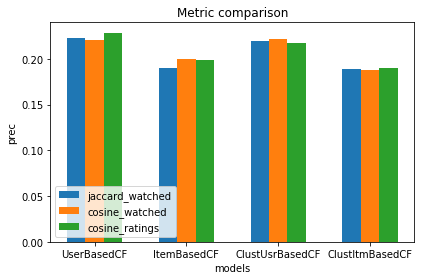

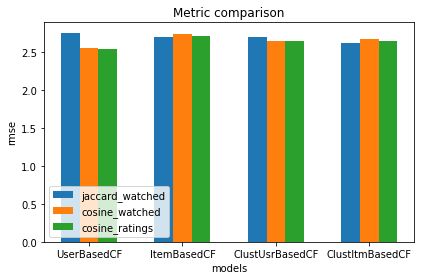

In [10]:
gen_grouped_histogram_bars(plots, models, metrics, func_metrics, repeat, 
                           show_bar_values=False, verbose=True, legend_loc=3)


